<a href="https://colab.research.google.com/github/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/notebooks/brand_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/datacamp/r-live-training-template/blob/master/assets/datacamp.svg?raw=True" alt = "DataCamp icon" width="50%">
</p>
<br><br>

## **Brand Analysis Using Social Media Data in R**

Welcome to this hands-on training where you will learn how to perform brand analysis from social media data using R. We will be using different R libraries to analyze twitter data and derive insights.

In this session, you will learn

* How to compare brand popularity by extracting and comparing follower counts
* How to promote a brand by identifying popular tweets
* How to evaluate brand salience and compare the same for two brands using tweet frequencies
* Understand brand perception through text mining and by visualizing key terms
* Perform sentiment analysis to understand customer's feelings and sentiments about a brand
* Visualize brand presence by plotting tweets on the map

## **The Dataset**

The datasets to be used in this training session are in RDS format which is a handy format to save and later import single R objects. These datasets comprise extracted live tweets using `rtweet` library. The datasets are:
* **tesla.rds**: Tweets searched on keyword 'tesla' pre-extracted from Twitter
* **toyota.rds**: Tweets searched on keyword 'toyota' pre-extracted from Twitter
* **tesla_small.rds**: Tweets searched on keyword 'tesla' pre-extracted from Twitter. This is a smaller dataset with fewer tweets.

* **car.rds**: Tweets searched on keyword 'electric car' pre-extracted from Twitter

Note that we will not be extracting live tweets from Twitter during this session as it invovles a setup process. We will be using pre-extracted tweets saved in RDS format.

**tesla.rds**: has 17979 records (tweets) and 90 columns of tweet text and associated metadata
**toyoto.rds**: has 17798 records (tweets) and 90 columns of tweet text and associated metadata
**tesla_small.rds**: has 500 records (tweets) and 90 columns of tweet text and associated metadata
**car.rds**: has 12925 records (tweets) and 90 columns of tweet text and associated metadata

All the datasets have the same set of columns and some of the important columns that we will work with are listed below:

- `user_id`: Twitter allocated unique ID for each twitter user.
- `created_at`: UTC time when this Tweet was created
- `screen_name`: The screen name or twitter handle that an user identifies themselves with
`text`: The actual tweet text posted by an user
- `retweet_count`: Number of times a given tweet has been retweeted.
- `followers_count`: The number of followers a twitter account currently has.
- `geo_coords`, `coords_coords`, `bbox_coords`: Represents geographic location of a tweet as reported by the user or client application


## **Getting started and exploring the dataset**

In [2]:
# Install R Packages
install.packages('rtweet')
install.packages('dplyr')
install.packages('reshape')
install.packages('ggplot2')
install.packages('qdapRegex')
install.packages('tm')
install.packages('qdap')
#install.packages('wordcloud')
#install.packages('RColorBrewer')
#install.packages('syuzhet')
#install.packages('maps')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘httpuv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘data.table’, ‘gtools’, ‘openNLPdata’, ‘rJava’, ‘bitops’, ‘xlsxjars’, ‘qdapDictionaries’, ‘qdapTools’, ‘chron’, ‘gdata’, ‘gender’, ‘gridExtra’, ‘igraph’, ‘openNLP’, ‘plotrix’, ‘RCurl’, ‘stringdist’, ‘venneuler’, ‘wordcloud’, ‘xlsx’, ‘XML’




In [0]:
# Load main rtweet library
library(rtweet)

### 1. Compare brand popularity by extracting and comparing follower counts

In [0]:
# Create a variable to store twitter account names of 4 auto magazines
users <- c("BreakingAuto", "Motorpic", "Mpgomatic", "Cjponyparts")

# Extract user data for the twitter accounts stored in users
# users_twt <- lookup_users(users)

# Save extracted data a CSV file using fwrite from data.table library
#fwrite(users_twt, file = "users_twt.csv")



In [0]:
# Import extracted user data from the csv file into a dataframe
users_twt = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/users_twt.csv?raw=true")

In [6]:
# View dimensions of the dataframe
dim(users_twt)

# View few rows of the dataframe
head(users_twt)

[1]  4 90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>,<lgl>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,64842021,6.46428e+17,2015-09-22T20:56:07Z,breakingauto,BREAKING: Diesel @VW scandal gives many auto writers their first-ever chance to write something negative about a car company. #dieselgate,Twitter for iPhone,NA,NA,NA,NA,⋯,2588,53,2009-08-11T22:17:02Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/64842021/1360630042,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/767205280/ba4_normal.jpg
2,2224287823,1.00793e+18,2018-06-16T10:36:41Z,MotorPic,"Mike, is that you? https://t.co/wPtS3O2WTX",Twitter Web Client,NA,NA,NA,NA,⋯,778,415,2013-12-01T05:27:45Z,FALSE,http://t.co/mHV8KvKFKs,http://motorpic.tumblr.com/,NA,https://pbs.twimg.com/profile_banners/2224287823/1398760164,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/540578665151488000/N8BTGt44_normal.jpeg
3,14408713,1.27124e+18,2020-06-12T00:34:54Z,MPGomatic,Don’t be a Knucklehead. Mask Up. https://t.co/NvZZsXw5WI,Twitter for iPhone,NA,NA,NA,NA,⋯,49243,116217,2008-04-16T14:51:28Z,FALSE,https://t.co/bhSRyW8nva,http://mpgomatic.com,NA,https://pbs.twimg.com/profile_banners/14408713/1463748746,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/733642299092000768/5VTU_005_normal.jpg
4,89528523,1.27119e+18,2020-06-11T21:00:37Z,cjponyparts,Pops doesn't want another set of wrenches this time around! Give the gift of pure parts happiness with a CJ's gift… https://t.co/zlQJ1FJFyM,Buffer,NA,NA,NA,NA,⋯,7198,1518,2009-11-12T20:10:03Z,TRUE,https://t.co/0CH2t8FvzQ,https://shopgr.id/cjponyparts,NA,https://pbs.twimg.com/profile_banners/89528523/1548186092,http://abs.twimg.com/images/themes/theme14/bg.gif,http://pbs.twimg.com/profile_images/3366855626/359799c70e188b7ead0fc0558980a09f_normal.png


In [0]:
# Create a data frame of screen names and follower counts
user_df <- users_twt[,c("screen_name","followers_count")]

In [8]:
# Display and compare the follower counts for the 4 news sites
user_df

screen_name,followers_count
<fct>,<int>
breakingauto,7303
MotorPic,3261
MPGomatic,3267
cjponyparts,53275


Inference

### 2. Promote a brand by identifying popular tweets using retweet counts

In [0]:
# Extract 18000 tweets on Tesla
#tweets = search_tweets("tesla", n = 18000, lang = "en", include_rts = FALSE)
#saveRDS(tweets, "tesla.rds")

In [0]:
# Import extracted tweets in CSV format into a dataframe
tesladf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/tesladf.csv?raw=true")

In [11]:
# Explore the tweet dataframe
dim(tesladf)
head(tesladf)

[1] 17979    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


In [12]:
# Create a data frame of tweet text and retweet count
rtwt <- tesladf[,c("text", "retweet_count")]

# View few rows of the rtwt dataframe
head(rtwt)

,text,retweet_count
,<fct>,<int>
1,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,0
2,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",0
3,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",0
4,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",0
5,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",0
6,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,0


In [13]:
# Import library
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


In [16]:
# Sort data frame based on descending order of retweet counts
rtwt_sort <- arrange(rtwt, desc(retweet_count))

# View sorted output
head(rtwt_sort)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


In [0]:
# Exclude rows with duplicate text from sorted data frame
rtwt_unique <- unique(rtwt_sort, by = "text")

In [18]:
# Print top 6 unique posts retweeted most number of times
rownames(rtwt_unique) <- NULL
head(rtwt_unique)

,text,retweet_count
,<fct>,<int>
1,Year these companies were founded: 2021: Hope your company 2011: Zoom 2009: Uber 2008: Airbnb 2006: Spotify 2006: Twitter 2004: Facebook 2003: Tesla 2002: SpaceX 1999: Alibaba 1998: Google 1997: Netflix 1994: Amazon 1976: Apple 1975: Microsoft 1946: Sony 1938: Samsung @ Jon E,1165
2,"All of a sudden, I think I want a Tesla. https://t.co/UFxfyQOJ8s",495
3,Elon Wins: California Will Allow Tesla Plant To Reopen With ‘Safety Precautions’ https://t.co/7XHKXKgBXM,480
4,"If you're a @Tesla worker, we'd love to chat. https://t.co/Lf27lBIHxw https://t.co/zEKICOaNaN",456
5,Tesla's Next Factory Is Going To Be In Austin Texas And It's Going To Happen Quickly 👏👏👏👏👏 To Much Trouble With Local California Government 🔥🔥🔥🔥🔥 https://t.co/qGTRo7l7ID,420
6,"This is the protest today at the Tesla plant in Fremont, Ca. These leftists want Elon Musk put behind bars for reopening. My God look at this massive crowd! 😂😭😭😭😭😭😭😭😭😭😭😭😭 https://t.co/DhKJZbBehB",361


Inference

### 3.	Evaluate brand salience

#### 3a) Visualizing frequency of tweets using time series plots

In [19]:
# View the tweet dataframe
head(tesladf)

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<lgl>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,1.016807e+18,1.262241e+18,2020-05-18T04:36:31Z,1LoafOfMeat,@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.,Twitter for Android,73,1.262107e+18,9.889751e+17,BLKMDL3,⋯,433,8164,2018-07-10T22:10:02Z,FALSE,,,NA,,,http://pbs.twimg.com/profile_images/1104867316322521091/2n_rsTF1_normal.jpg
2,1.198000e+18,1.262241e+18,2020-05-18T04:36:17Z,2beaux,"@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?",Twitter for iPad,149,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
3,1.198000e+18,1.262240e+18,2020-05-18T04:32:08Z,2beaux,"@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan.",Twitter for iPad,277,1.262232e+18,7.153370e+17,TrevSully,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
4,1.198000e+18,1.262218e+18,2020-05-18T03:04:49Z,2beaux,"@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs.",Twitter for iPad,214,1.262217e+18,2.323148e+09,Miss_Violet2014,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
5,1.198000e+18,1.262163e+18,2020-05-17T23:28:26Z,2beaux,"@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue.",Twitter for iPad,186,1.262131e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg
6,1.198000e+18,1.262198e+18,2020-05-18T01:47:00Z,2beaux,@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people.,Twitter for iPad,199,1.262198e+18,1.169874e+18,jamison_casper,⋯,583,362,2019-11-22T22:08:28Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1198000188125827072/1580443845,,http://pbs.twimg.com/profile_images/1211049247426134018/ID1dUN5X_normal.jpg


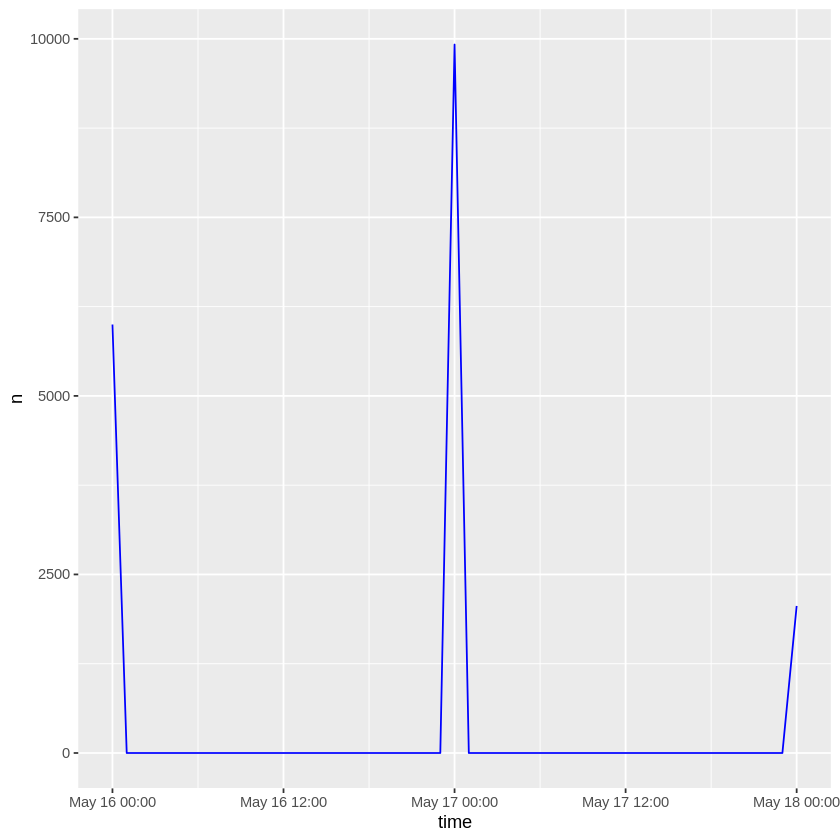

In [20]:
# Create a time series plot
ts_plot(tesladf, by = "hours", color = "blue")

#### 3b) Compare brand salience for two brands using time series plots and tweet frequencies


In [0]:
## Extract tweets for Toyota

#tweets_toyo = search_tweets("toyota", n = 18000, lang = "en", include_rts = FALSE)

#fwrite(tweets_toyo, file = "toyotadf.csv")


In [0]:
# Import extracted tweets in CSV format into a dataframe
toyotadf = read.csv("https://github.com/datacamp/Brand-Analysis-using-Social-Media-Data-in-R-Live-Training/blob/master/data/toyotadf.csv?raw=true")


In [23]:
# Explore the tweet dataframe for toyota
dim(toyotadf)
head(toyotadf)

[1] 17798    90

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,⋯,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>,<fct>,<fct>
1,2.914718e+07,1.26e+18,2020-05-18T05:09:56Z,LowyatNET,#Toyota Launches Its Flagship Store On @LazadaMY ; Bookings Done Via App https://t.co/X5HTc6DFx8 https://t.co/sEcdqa4K6w,TweetDeck,97,NA,NA,,⋯,46053,828,2009-04-06T04:58:33Z,TRUE,https://t.co/74yFDctZGp,http://www.lowyat.net,NA,https://pbs.twimg.com/profile_banners/29147175/1489395700,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/841210781177802752/VD5lHJw__normal.jpg
2,5.168350e+08,1.26e+18,2020-05-18T05:08:31Z,RonaldoPardede,"* RULES: * ALL WIVES OF MINE CAN START MARKETING ""SUZUKI"", MOTORS &amp; CARS, &amp; ""SUBARU"", CARS, &amp; ""ISUZU"", MOTORS &amp; CARS, &amp; ""TOYOTA"", CARS, &amp; ""HONDA"", MOTORS &amp; CARS, TO KARYS YOSEF &amp; SANTO PETRUS PEOPLE...LOVE YOU WIVES FOREVER...",Twitter for Android,258,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
3,5.168350e+08,1.26e+18,2020-05-13T09:53:36Z,RonaldoPardede,"* NY. SHUI SUI PARDEDE ONE (150 CM), ""CMO"" CHIEF MARKETING OFFICER, CAN TALK TO INSURANCE COMPANY ""AIA"" OR TO CARS COMPANIES ""FORD"" &amp; ""LINCOLN"" &amp; ""HONDA"" &amp; ""TOYOTA"" FOR MARKETING OUR PRODUCTS...WE CAN HAVE BONUS &amp; PAYCHECKS &amp; SERVICE FEES FOR MARKETING OUR COMPANIES' PRODUCTS.",Twitter for Android,297,1.26e+18,5.168350e+08,RonaldoPardede,⋯,49118,46675,2012-03-06T19:57:25Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/516834962/1563001412,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1145742955065380867/HY4X3hWE_normal.png
4,3.266185e+09,1.26e+18,2020-05-18T05:08:04Z,DaOtherShip,@StillJustDave You going to start charging Toyota rent for living in your head like that? 😂😂,Twitter for iPhone,77,1.26e+18,1.220000e+18,StillJustDave,⋯,15957,95015,2015-07-02T16:59:08Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/3266185284/1453081985,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1224826150146449408/G-LTikOh_normal.jpg
5,1.050000e+18,1.26e+18,2020-05-18T05:07:59Z,itsvantime,"@Twonius I dunno, though I think it’ll be hard to top the styling of the outgoing generation (pre-facelifts), some of Toyota’s bread and butter has been looking pretty decent lately (new Highlander), so there’s some hope...",Twitter for iPhone,214,1.26e+18,9.931703e+08,Twonius,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg
6,1.050000e+18,1.26e+18,2020-05-17T19:34:43Z,itsvantime,New Sienna tomorrow (we guess that leaked slide was on the money. Now... will there be a Sienna Prime? Hope so!) https://t.co/AaSuJe44e8,Twitter for iPhone,112,NA,NA,,⋯,14144,17312,2018-10-18T19:11:40Z,FALSE,,,NA,https://pbs.twimg.com/profile_banners/1053000678870663168/1539890325,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1152119259570397185/anSvc_gr_normal.jpg


In [0]:
# Create a time series object for Tesla at hourly intervals
tesla_ts <- ts_data(tesladf, by ='hours')

In [25]:
# Rename the two columns in the time series object
names(tesla_ts) <- c("time", "tesla_n")

# View the output
head(tesla_ts)

time,tesla_n
<dttm>,<int>
2020-05-16 00:00:00,6000
2020-05-16 01:00:00,0
2020-05-16 02:00:00,0
2020-05-16 03:00:00,0
2020-05-16 04:00:00,0
2020-05-16 05:00:00,0


In [26]:
# Create a time series object for Toyota at hourly intervals
toyo_ts <- ts_data(toyotadf, by ='hours')

# Rename the two columns in the time series object
names(toyo_ts) <- c("time", "toyo_n")

# View the output
head(toyo_ts)

time,toyo_n
<dttm>,<int>
2020-05-12 00:00:00,3018
2020-05-12 01:00:00,0
2020-05-12 02:00:00,0
2020-05-12 03:00:00,0
2020-05-12 04:00:00,0
2020-05-12 05:00:00,0


In [27]:
# Load the required libraries
library(reshape)
library(ggplot2)


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename




In [28]:
# Merge the time series objects with "time" as the common column
merged_df <- merge(tesla_ts, toyo_ts, by = "time", all = TRUE)

# View few rows of the merged dataframe
head(merged_df)

,time,tesla_n,toyo_n
,<dttm>,<int>,<int>
1,2020-05-12 00:00:00,NA,3018
2,2020-05-12 01:00:00,NA,0
3,2020-05-12 02:00:00,NA,0
4,2020-05-12 03:00:00,NA,0
5,2020-05-12 04:00:00,NA,0
6,2020-05-12 05:00:00,NA,0


In [29]:
# Stack the tweet frequency columns
melt_df <- melt(merged_df, na.rm = TRUE, id.vars = "time")

# View the output
head(melt_df)

,time,variable,value
,<dttm>,<fct>,<int>
1,2020-05-16 00:00:00,tesla_n,6000
2,2020-05-16 01:00:00,tesla_n,0
3,2020-05-16 02:00:00,tesla_n,0
4,2020-05-16 03:00:00,tesla_n,0
5,2020-05-16 04:00:00,tesla_n,0
6,2020-05-16 05:00:00,tesla_n,0


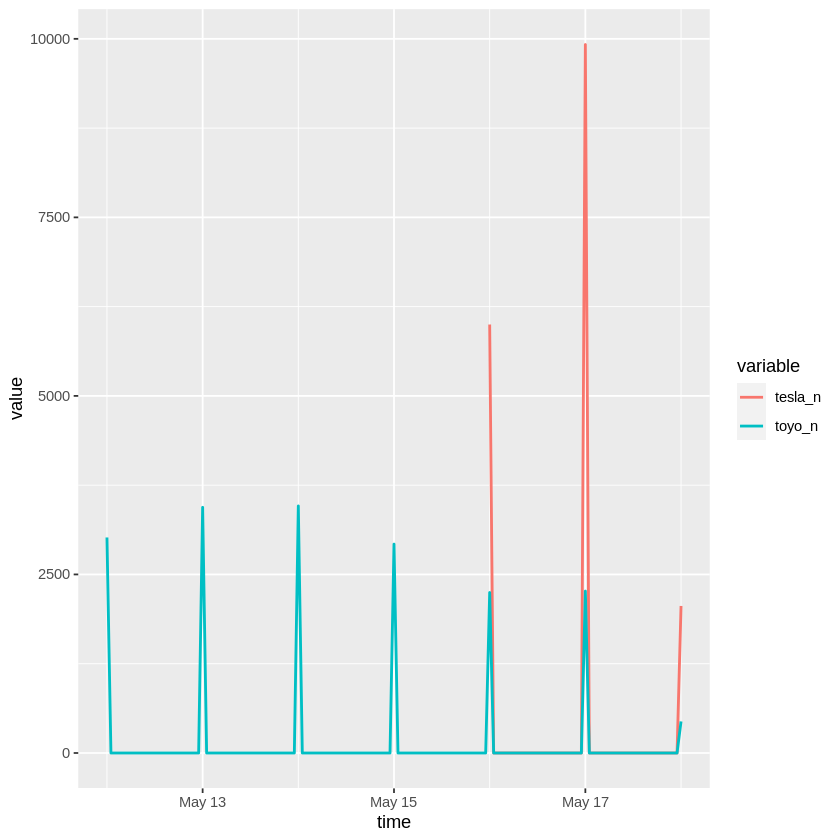

In [30]:
## Compare brand salience by plotting the frequency of tweets

# Plot frequency of tweets on Tesla and Toyota
ggplot(data = melt_df, aes(x = time, y = value, col = variable))+
  geom_line(lwd = 0.8)

## 4. Understand brand perception through text mining and by visualizing key terms

### 4a) Text mining by processing twitter text


In [31]:
# Extract tweet text from the Tesla dataset
twt_txt <- tesladf$text
head(twt_txt)

[1] @BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99.                                                                                                                                                                                                                     
[2] @TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old.  He not only was an investor, he built the company.\n\nBTW, do you even know what “B shares” are?                                                                                                                                  
[3] @TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies.\n\nMusk is famously known to be an obsessed workaholic.  *That* has more to do with his success than anything else.\n\nYou sound petty, jealous and small.  When you accomplish what he accomplished, then you can bitch an moan.
[4] @Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move.\n\nBut if they do it will be because Musk thought it would be a positive.  Further, the new location will employ lots of new people.\n\nAlameda county isn’t the only place in the U.S. that needs jobs.                                         
[5] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing.\n\nDoesn’t seem to be an issue.                                                                       
[6] @jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof?  Are Alameda people more important than people elsewhere?\n\nTesla could help those people.                                                          
17896 Levels: -- Elon Musk (@elonmusk) May 9, 2020 Just a couple hours later is when Gonzalez tweeted "F*ck Elon Musk." #elonmusk #tesla https://t.co/XgAlbc1BXj ...

#### i) Remove URLs and characters other than letters

In [32]:
# Load the library
library(qdapRegex)


Attaching package: ‘qdapRegex’


The following object is masked from ‘package:ggplot2’:

    %+%


The following object is masked from ‘package:dplyr’:

    explain




In [33]:
# Remove URLs from the tweet text and view the output
twt_txt_url <- rm_twitter_url(twt_txt)

# View few rows of the dataframe
head(twt_txt_url)

[1] "@BLKMDL3 @elonmusk @Tesla Oh sure ya showoff. Had to get the brand name fancy stuff. Mine is $1.99."                                                                                                                                                                                                             
[2] "@TrevSully @ThomboyD @elonmusk BTW, Musk bought into Tesla when it was one-year old. He not only was an investor, he built the company. BTW, do you even know what “B shares” are?"                                                                                                                              
[3] "@TrevSully @ThomboyD @elonmusk He bought Tesla and built a handful of other companies. Musk is famously known to be an obsessed workaholic. *That* has more to do with his success than anything else. You sound petty, jealous and small. When you accomplish what he accomplished, then you can bitch an moan."
[4] "@Miss_Violet2014 @jamison_casper @ThomboyD @elonmusk Tesla won’t move. But if they do it will be because Musk thought it would be a positive. Further, the new location will employ lots of new people. Alameda county isn’t the only place in the U.S. that needs jobs."                                        
[5] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk I believe the county approved Tesla’s COVID-19 Prevention plan (subject to some additional requirements) and will, with the police, enforce safe distancing. Doesn’t seem to be an issue."                                                                  
[6] "@jamison_casper @Miss_Violet2014 @ThomboyD @elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof? Are Alameda people more important than people elsewhere? Tesla could help those people."

#### ii) Replace special characters, punctuations and numbers

In [34]:
# Replace special characters, punctuation, & numbers with spaces
twt_txt_chrs  <- gsub("[^A-Za-z]"," " , twt_txt_url)

# View text after replacing special characters, punctuation, & numbers
head(twt_txt_chrs)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                             
[2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                              
[3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "
[4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                        
[5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                  
[6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "

#### iii)  Build a corpus

In [35]:
# Load libraries
library(tm)
library(dplyr)

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate




In [36]:
# Convert processed text to a text corpus and view output
twt_corpus <- twt_txt_chrs %>% 
                VectorSource() %>% 
                Corpus() 

# View the content column in the corpus
head(twt_corpus$content)

[1] " BLKMDL   elonmusk  Tesla Oh sure ya showoff  Had to get the brand name fancy stuff  Mine is       "                                                                                                                                                                                                             
[2] " TrevSully  ThomboyD  elonmusk BTW  Musk bought into Tesla when it was one year old  He not only was an investor  he built the company  BTW  do you even know what  B shares  are "                                                                                                                              
[3] " TrevSully  ThomboyD  elonmusk He bought Tesla and built a handful of other companies  Musk is famously known to be an obsessed workaholic   That  has more to do with his success than anything else  You sound petty  jealous and small  When you accomplish what he accomplished  then you can bitch an moan "
[4] " Miss Violet      jamison casper  ThomboyD  elonmusk Tesla won t move  But if they do it will be because Musk thought it would be a positive  Further  the new location will employ lots of new people  Alameda county isn t the only place in the U S  that needs jobs "                                        
[5] " jamison casper  Miss Violet      ThomboyD  elonmusk I believe the county approved Tesla s COVID    Prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  Doesn t seem to be an issue "                                                                  
[6] " jamison casper  Miss Violet      ThomboyD  elonmusk What about other areas of the country where people are struggling and unemployment is going through the roof  Are Alameda people more important than people elsewhere  Tesla could help those people "

#### iv)  Convert corpus to lowercase

In [37]:
# Convert the corpus to lowercase
twt_corpus_lwr <- tm_map(twt_corpus, tolower) 

# View the corpus after converting to lowercase
head(twt_corpus_lwr$content)

Warning message in tm_map.SimpleCorpus(twt_corpus, tolower):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff  had to get the brand name fancy stuff  mine is       "                                                                                                                                                                                                             
[2] " trevsully  thomboyd  elonmusk btw  musk bought into tesla when it was one year old  he not only was an investor  he built the company  btw  do you even know what  b shares  are "                                                                                                                              
[3] " trevsully  thomboyd  elonmusk he bought tesla and built a handful of other companies  musk is famously known to be an obsessed workaholic   that  has more to do with his success than anything else  you sound petty  jealous and small  when you accomplish what he accomplished  then you can bitch an moan "
[4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move  but if they do it will be because musk thought it would be a positive  further  the new location will employ lots of new people  alameda county isn t the only place in the u s  that needs jobs "                                        
[5] " jamison casper  miss violet      thomboyd  elonmusk i believe the county approved tesla s covid    prevention plan  subject to some additional requirements  and will  with the police  enforce safe distancing  doesn t seem to be an issue "                                                                  
[6] " jamison casper  miss violet      thomboyd  elonmusk what about other areas of the country where people are struggling and unemployment is going through the roof  are alameda people more important than people elsewhere  tesla could help those people "

#### v) Remove stop words from the Corpus

In [38]:
# Remove English stop words from the corpus and view the corpus
twt_corpus_stpwd <- tm_map(twt_corpus_lwr, removeWords, stopwords("english"))

# View the content column
head(twt_corpus_stpwd$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_lwr, removeWords, stopwords("english")):
“transformation drops documents”


[1] " blkmdl   elonmusk  tesla oh sure ya showoff    get  brand name fancy stuff  mine        "                                                                                                                                            
[2] " trevsully  thomboyd  elonmusk btw  musk bought  tesla    one year old       investor   built  company  btw    even know   b shares   "                                                                                               
[3] " trevsully  thomboyd  elonmusk  bought tesla  built  handful   companies  musk  famously known    obsessed workaholic           success  anything else   sound petty  jealous  small    accomplish   accomplished    can bitch  moan "
[4] " miss violet      jamison casper  thomboyd  elonmusk tesla won t move       will   musk thought     positive     new location will employ lots  new people  alameda county isn t   place   u s   needs jobs "                         
[5] " jamison casper  miss violet      thomboyd  elonmusk  believe  county approved tesla s covid    prevention plan  subject   additional requirements   will    police  enforce safe distancing  doesn t seem    issue "                 
[6] " jamison casper  miss violet      thomboyd  elonmusk    areas   country  people  struggling  unemployment  going   roof   alameda people  important  people elsewhere  tesla  help  people "

#### vi) Remove additional spaces from the Corpus

In [39]:
# Remove additional spaces from the corpus
twt_corpus_final <- tm_map(twt_corpus_stpwd, stripWhitespace)

# View the text corpus after removing spaces
head(twt_corpus_final$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_stpwd, stripWhitespace):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                       
[2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                   
[3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "
[4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                    
[5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "      
[6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "

## vii) Remove custom stop words from the Corpus

In [40]:
# Load the library qdap
library(qdap)

Loading required package: qdapDictionaries

Loading required package: qdapTools


Attaching package: ‘qdapTools’


The following object is masked from ‘package:dplyr’:

    id


Loading required package: RColorBrewer


Attaching package: ‘qdap’


The following objects are masked from ‘package:tm’:

    as.DocumentTermMatrix, as.TermDocumentMatrix


The following object is masked from ‘package:NLP’:

    ngrams


The following object is masked from ‘package:reshape’:

    condense


The following object is masked from ‘package:dplyr’:

    %>%


The following object is masked from ‘package:rtweet’:

    %>%


The following object is masked from ‘package:base’:

    Filter




In [41]:
# Extract term frequencies for top 60 words in the Corpus
termfreq  <-  freq_terms(twt_corpus_final, 60)

# View the output
termfreq

,WORD,FREQ
,<chr>,<dbl>
24925,tesla,19035
21723,s,5543
7873,elonmusk,4791
24513,t,2851
27825,will,1709
7863,elon,1583
3587,can,1569
14493,like,1538
13362,just,1389


In [0]:
# Create a vector of custom stop words
custom_stopwds <- c("tesla", "s", "t", "will", "elon", "can", "like", 
				"just", "musk", "one", "m",  "get", "now", "cars", "amp", 
                "re", "go", "even", "via")

In [45]:
# Remove custom stop words and create a refined corpus
corp_refined <- tm_map(twt_corpus_final,removeWords, custom_stopwds)

# View the text corpus after removing custom stop words
head(twt_corpus_final$content)

Warning message in tm_map.SimpleCorpus(twt_corpus_final, removeWords, custom_stopwds):
“transformation drops documents”


[1] " blkmdl elonmusk tesla oh sure ya showoff get brand name fancy stuff mine "                                                                                                                       
[2] " trevsully thomboyd elonmusk btw musk bought tesla one year old investor built company btw even know b shares "                                                                                   
[3] " trevsully thomboyd elonmusk bought tesla built handful companies musk famously known obsessed workaholic success anything else sound petty jealous small accomplish accomplished can bitch moan "
[4] " miss violet jamison casper thomboyd elonmusk tesla won t move will musk thought positive new location will employ lots new people alameda county isn t place u s needs jobs "                    
[5] " jamison casper miss violet thomboyd elonmusk believe county approved tesla s covid prevention plan subject additional requirements will police enforce safe distancing doesn t seem issue "      
[6] " jamison casper miss violet thomboyd elonmusk areas country people struggling unemployment going roof alameda people important people elsewhere tesla help people "

In [46]:
# Extract term frequencies for the top 60 words
termfreq_clean <- freq_terms(corp_refined, 60)

# View the output
termfreq_clean

,WORD,FREQ
,<chr>,<dbl>
7869,elonmusk,4791
3669,car,1256
16253,model,1082
17083,new,961
7076,don,902
23378,spacex,894
18619,people,882
3417,buy,766
25390,think,751
